Modified and improved from base code from IBM Coursera: Machine Learning with Python

In [32]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [33]:
!pip install scikit-learn==0.23.1

In [34]:
import requests

# store url of dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
# Create requests variable 
r = requests.get(url, allow_redirects=True)
# Write content of request to 'ChurnData.csv' file
open('ChurnData.csv', 'wb').write(r.content)

35943

In [35]:
df = pd.read_csv("ChurnData.csv")

# take a look at the dataset
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [36]:
df.shape

(200, 28)

### EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [38]:
df.nunique().sort_values(ascending=False)

longten     198
longmon     157
loglong     157
cardten     124
lninc       101
income      101
tollten      99
cardmon      92
equipmon     82
tenure       68
tollmon      65
logtoll      65
wiremon      57
age          51
address      40
employ       35
ed            5
custcat       4
confer        2
ebill         2
internet      2
callwait      2
wireless      2
pager         2
voice         2
equip         2
callcard      2
churn         2
dtype: int64

Note: bookmark one-hot encoding following categorical features in future improvements against baseline model.
['ed','custcat','confer','ebill','internet','callwait','wireless','pager','voice','equip','callcard']

#### Check correlation with churn

In [39]:
# Check feature variables correlation with emissions
df.loc[:, df.columns!='churn']\
    .corrwith(df['churn'])\
    .sort_values(ascending=False)\
    .to_frame()\
    .style\
    .bar(vmin=-1, align='zero', vmax=1)

,0
equip,0.275284
equipmon,0.255348
ebill,0.254838
internet,0.254838
ed,0.216112
wiremon,0.177483
wireless,0.174356
voice,0.142315
pager,0.124623
custcat,0.014839


### Data Pre-processing and Selection

In [40]:
# Define X 
from sklearn import preprocessing

X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]
# normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [41]:
# Define y and convert to integer for sklearn algorithm
y = np.asarray(df['churn']).astype('int')
y [0:5]

array([1, 1, 0, 0, 0])

In [42]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Create and Fit Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [44]:
# Predict
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
# Get estimates for classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

### Evaluation

#### Jaccard Index

In [46]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

#### Confusion Matrix

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


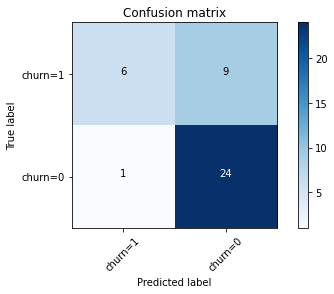

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

#### F-1 score

In [49]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



#### log loss

In [50]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187

## Loop - Optimize Solver and Regularization Values

In [51]:
# create function to iterate through Logistic Regression models with different C and solver parameters
from sklearn.metrics import f1_score

def generate_LR(X_train, y_train, X_test, y_test, C, solver):
    """
    This function runs a Logistic Regression model with provided C and solver parameters.
    Jaccard score, F1 score and log loss are returned.
    """
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    
    my_jaccard_score = jaccard_score(y_test, yhat,pos_label=0)
    my_f1_score = f1_score(y_test, yhat)
    my_log_loss = log_loss(y_test, yhat_prob)
    
    return (my_jaccard_score, my_f1_score, my_log_loss)

In [52]:

# iterate through different solvers for LR model
solver_types = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

scoredict = {
  "best_jaccard_score": 0,
  "best_f1_score": 0,
  "best_logloss_score": 1000,
  "best_jaccard_C": "null",
  "best_jaccard_solver": "null",
  "best_f1_score_C": "null",
  "best_f1_score_solver": "null",
  "best_logloss_score_C": "null",
  "best_logloss_score_solver": "null"
}

for solver in solver_types:
    for C in C_values:
        my_jaccard_score, my_f1_score, my_log_loss = generate_LR(X_train, y_train, X_test, y_test, C, solver)
        #print(f'C: {C} \tSolver: {solver} \tjaccard_score: {my_jaccard_score} \tf1_score: {my_f1_score} \tlog_loss: {my_log_loss}')
        
        # update scoredict with C and solver values for best accuracy evaluation
        if my_jaccard_score > scoredict['best_jaccard_score']:
            scoredict['best_jaccard_score'] = my_jaccard_score
            scoredict['best_jaccard_C'] = C
            scoredict['best_jaccard_solver'] = solver

        if my_f1_score > scoredict['best_f1_score']:
            scoredict['best_f1_score'] = my_f1_score
            scoredict['best_f1_score_C'] = C
            scoredict['best_f1_score_solver'] = solver
            
        if my_log_loss < scoredict['best_logloss_score']:
            scoredict['best_logloss_score'] = my_log_loss
            scoredict['best_logloss_score_C'] = C
            scoredict['best_logloss_score_solver'] = solver
            

# Iterate over scoredict and print
for key, value in scoredict.items():
    print(key, ':', value)

best_jaccard_score : 0.7058823529411765
best_f1_score : 0.5454545454545455
best_logloss_score : 0.6017092478101187
best_jaccard_C : 0.001
best_jaccard_solver : newton-cg
best_f1_score_C : 0.001
best_f1_score_solver : newton-cg
best_logloss_score_C : 0.001
best_logloss_score_solver : newton-cg
